# Study of ads for the sale of apartments

We have at our disposal the data of the Yandex.Realty service - an archive of ads for the sale of apartments in St. Petersburg and neighboring settlements for several years. You need to learn how to determine the market value of real estate. The task is to set the parameters. This will allow to build an automated system: it will track anomalies and fraudulent activity.

Two types of data are available for each apartment for sale. The first ones are entered by the user, the second ones are obtained automatically on the basis of cartographic data. For example, the distance to the center, airport, nearest park and reservoir.

### General conclusion
#### After analyzing the data, it turned out that (further on points):
1. Most listings fall within the living space range of around 50 m2 - more than 11,000 listings;
2. The area of ​​the kitchen is 5-15m2 in most cases, the sample is about 18 thousand ads;
3. The most common living area - up to 50m2 - about 21 thousand square meters. ads;
4. 3-6 million rubles - this price range covers most of the ads in the dataset.
5. The frequency of appearance of announcements by the number of rooms - 1-room - about 8 thousand, 2-room - about 7.9 thousand, 3-room - about 5.9 thousand;
6. Ceiling height in apartments for sale in most ads up to 2.7m.;
7. Most apartments are located on floors 1 to 5.;
8. Apartments are sold mainly in five-story buildings (about 6.8 thousand ads) and in nine-story buildings (about 4.1 thousand ads);
9. The largest number of distances from the city center lies in the range from 10-15 km - about 8 thousand ads;
10. Most of the apartments for sale are located at a distance of 15 km from the nearest airport;
11. The distance of the real estate for sale from the parks in most cases does not exceed 500 m.
12. On weekends, announcements are submitted less frequently than on weekdays (more than twice);
14. On average, apartments were sold for approximately 181 days, with a median value of 95. Abnormally long sales - over 500 days. Fast sales - up to 45 days.
15. The median cost of apartments located on the first floor is 3.9 million rubles, apartments located on the top floor - 4.3 million, and apartments located neither on the first nor on the last - 4.85.
16. The median cost for an apartment was observed in 2014 - about 7.7 million rubles, then decreased by 2016 - up to 4.5 million, and by 2019 it grew a little and reached the mark of 5 million;
17. The highest average price per sq.m. in the list of the most frequent cities according to the submitted ads in St. Petersburg - 114795.4 rubles;
18. Lowest average price per sq.m. in the list of the most frequent cities according to the submitted ads in Vyborg - 58238.1 rubles;


### General information about the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
df.tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,False,False,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,False,False,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,False,False,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,False,False,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,False,False,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.duplicated().sum()

0

In [7]:
length_start_df = len(df)
length_start_df

23699

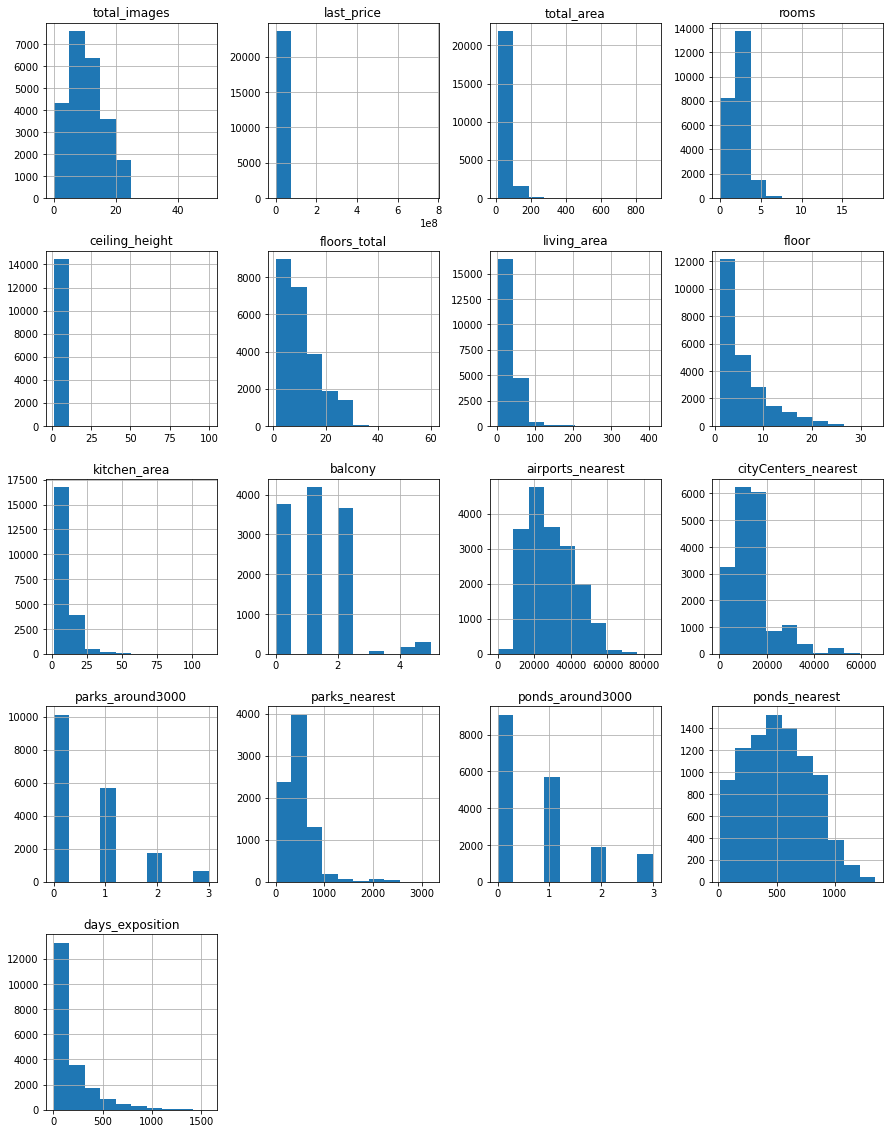

In [8]:
df.hist(figsize=(15, 20));

### Outstanding values ​​in the last_price category are noticeable - real estate for 800 million and an apartment with an area of ​​900 m2 (and this is not the same apartment, as one might immediately assume). In the rooms column, it is noticeable that in some cases there are apartments with up to 20 rooms (19 to be exact, as well as 16, 15, 14). Here, too, the record holder is not the most expensive in the sample. In the ceiling_height column, there are cases with a ceiling height of more than 10 meters (there are even 100), which is not very hard to believe. In the kitchen_area column, the indicators of 100m2 are striking. Otherwise, I do not observe any outstanding indicators.

## Data preprocessing

#### Look at the share of empty values ​​in the dataset.
Below you can see that the **is_apartment** column stands out the most in the dataset - only ~ 12% of the filled cells from the total number. Columns related to geolocation - **parks_nearest, ponds_nearest, airports_nearest, cityCenters_nearest, ponds_around3000, parks_around3000** - all the gaps in them are related to the lack of specifying the address of the real estate for sale and for this reason there were gaps In the column **ceiling_height** gaps were formed here, as an option, as a result of a combination of events when a person does not intentionally indicate this information when submitting an ad (different ceiling geometry, simply ignorance of this value) and data upload errors. And the second reason seems to me the main one.

In [9]:
df.isna().mean().sort_values(ascending=False)

is_apartment            0.882906
parks_nearest           0.659100
ponds_nearest           0.615596
balcony                 0.486054
ceiling_height          0.387991
airports_nearest        0.233850
cityCenters_nearest     0.232879
ponds_around3000        0.232837
parks_around3000        0.232837
days_exposition         0.134225
kitchen_area            0.096122
living_area             0.080299
floors_total            0.003629
locality_name           0.002068
total_images            0.000000
last_price              0.000000
studio                  0.000000
floor                   0.000000
rooms                   0.000000
first_day_exposition    0.000000
total_area              0.000000
open_plan               0.000000
dtype: float64

In [10]:
nan_in_df = df.isna().sum().sort_values(ascending=False)
nan_in_df

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

In [11]:
#lines with gaps in locality_name and floors_total are removed.
df = df.dropna(subset=['locality_name', 'floors_total']).reset_index(drop=True)

In [12]:
#checking for a linear relationship between the indicators "rooms" and "living area"
#expectedly, these indicators are in a strong direct linear relationship
df['rooms'].corr(df['living_area'])

0.846116853039896

In [13]:
df.groupby('rooms', dropna=False)['living_area'].median()

rooms
0      18.000
1      17.600
2      30.500
3      45.000
4      63.650
5      91.785
6     124.400
7     145.000
8     161.000
9     179.200
10    161.400
11    133.900
12    409.700
14    195.150
15    409.000
16    180.000
19    264.500
Name: living_area, dtype: float64

In [14]:
#gaps in living_area are replaced by medians
#values ​​of individual groups of apartments according to the number of rooms.
for _ in df['rooms'].unique():
    df.loc[(df['rooms'] == _) & (df['living_area'].isna()), \
           'living_area'] = df.loc[df['rooms'] == _, 'living_area'].median() 

In [15]:
df['balcony'] = df['balcony'].fillna(0)

In [16]:
df['balcony'] = df['balcony'].astype('int')

In [17]:
#examination. gaps in ponds_nearest are either matched with column gaps
#ponds_around3000 or with 0 values. This will allow me to make an assumption that
# gaps in these columns are formed due to the lack of water bodies in the cases under consideration and / or,
#the absence of an indication of the address of the property being sold (it is impossible to pull up geolocation data), which
# in turn makes it possible to enter instead of all gaps in the column ponds_around3000 the value 0
#and leave NaN in ponds_nearest
nan_in_df['ponds_nearest'] == (
    len(df[((df['ponds_around3000'] == 0) |
            (df['ponds_around3000'].isna())) &
           (df['ponds_nearest'].isna())])
)

False

In [18]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

In [19]:
#by analogy with the previous output
nan_in_df['parks_nearest'] ==(
    len(df[((df['parks_around3000'] == 0) |
            (df['parks_around3000'].isna())) &
           (df['parks_nearest'].isna())])
)

False

In [20]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)

In [21]:
#passes in kitchen_area appeared due to the lack of a kitchen as a separate unit,
#149 passes came here from the studio apartments, the rest I believe can be combined with the living room,
#For example. And if there is no kitchen, then there is no area either.
df['kitchen_area'] = df['kitchen_area'].fillna(0)

In [22]:
df.isna().sum().sort_values(ascending=False)

is_apartment            20805
parks_nearest           15535
ponds_nearest           14529
ceiling_height           9084
airports_nearest         5524
cityCenters_nearest      5501
days_exposition          3171
kitchen_area                0
ponds_around3000            0
parks_around3000            0
locality_name               0
balcony                     0
total_images                0
last_price                  0
studio                      0
floor                       0
living_area                 0
floors_total                0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  int64  
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

In [24]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [25]:
df['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

In [26]:
for wrong_value in df['ceiling_height'].sort_values().unique():
    if 20 <= wrong_value < 100:
        df['ceiling_height'] =  df['ceiling_height'].replace(wrong_value, wrong_value / 10)
df['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.26,   2.3 ,
         2.34,   2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,
         2.51,   2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,
         2.59,   2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,
         2.67,   2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,
         2.75,   2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,
         2.83,   2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,
         2.91,   2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,
         2.99,   3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,
         3.07,   3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,
         3.15,   3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,
         3.24,   3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,
         3.32,   3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,
         3.4 ,   3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,
      

#### Filtering the dataset excluding rows where the ceiling height is more than 6m and less than 2m.

In [27]:
df = df[(df['ceiling_height'].isna()) | (df['ceiling_height'] < 6) & (df['ceiling_height'] > 2)]

In [28]:
df[(df['ceiling_height'].isna()) | (df['ceiling_height'] < 6) & (df['ceiling_height'] > 2)].count()

total_images            23542
last_price              23542
total_area              23542
first_day_exposition    23542
rooms                   23542
ceiling_height          14458
floors_total            23542
living_area             23542
floor                   23542
is_apartment             2757
studio                  23542
open_plan               23542
kitchen_area            23542
balcony                 23542
locality_name           23542
airports_nearest        18028
cityCenters_nearest     18051
parks_around3000        23542
parks_nearest            8022
ponds_around3000        23542
ponds_nearest            9028
days_exposition         20375
dtype: int64

In [29]:
df['living_area'].sort_values(ascending=False).unique()

array([409.7, 409. , 347.5, ...,   5. ,   3. ,   2. ])

#### In the living_area column, values ​​up to 5m2 look abnormal (with an area of ​​139m2 or even 41m2, living area values ​​of 3m2 are hardly visible)

In [30]:
df[df['living_area'] < 10][['total_area', 'living_area']].sort_values(by='living_area')

,total_area,living_area
21634,23.00,2.0
13837,52.00,2.0
23442,139.00,3.0
3228,41.00,3.0
17483,22.00,5.0
21818,77.60,5.4
16342,31.00,6.0
19144,33.00,6.5
20877,50.60,8.0
23077,37.00,8.0


In [31]:
df = df[df['living_area'] >= 5]

In [32]:
#in the last_price column, the value of 12k does not inspire confidence, I will delete it.
df = df[df['last_price'] != df['last_price'].min()].reset_index(drop=True)

In [34]:
#I will assume that the residential area should be no more than 75% of the non-residential area
df = (df[(df['total_area'] < 200) & (df['last_price'] < 40000000) & 
    (df['rooms'] < 7) & (df['living_area'] < 150)])

In [35]:
len(df) / length_start_df

0.9784801046457656

#### Lost about 2.2 percent of the original sample

In [36]:
#понимаю, выглядит не очень, но мне помогло немного сохранить мое зрение 
a = [i for i in list(df['locality_name'].sort_values().unique()) if " " in i] 
b = [i for i in list(df['locality_name'].sort_values().unique()) if " " not in i]
right_name = []
wrong_name = []
for i in a:
    for j in b:
        if j in i:
            right_name.append(j)
            right_name.append(i)
right_name

['Кудрово',
 'деревня Кудрово',
 'Кингисепп',
 'поселок Кингисеппский',
 'Коммунар',
 'поселок Коммунары',
 'Любань',
 'поселок Любань',
 'Мурино',
 'поселок Мурино',
 'Луга',
 'поселок Усть-Луга',
 'Мурино',
 'посёлок Мурино',
 'Луга',
 'посёлок Усть-Луга',
 'Никольское',
 'село Никольское',
 'Высоцк',
 'село Русско-Высоцкое']

In [37]:
list_1 = []
list_2 = []
for i in a:
    if 'поселок'  in i:
        list_1.append(i)
        list_2.append(i.replace('поселок', 'посёлок'))
print(list_1[0])
list_2[0]

городской поселок Большая Ижора


'городской посёлок Большая Ижора'

In [38]:
duplicates = ['деревня Кудрово', 'поселок Любань', 'поселок Мурино', 'посёлок Мурино', 'село Никольское']
correct_named = ['Кудрово', 'Любань', 'Мурино', 'Мурино', 'Никольское']
df['locality_name'] = df['locality_name'].replace(duplicates, correct_named)
df['locality_name'] = df['locality_name'].replace(list_1, list_2)

In [39]:
# add a column with price per m2
df['price_one_sq_m'] = df['last_price'] / df['total_area']

In [40]:
#column with the digital designation of the day
df['ad_day'] = pd.DatetimeIndex(df['first_day_exposition']).day_name()
def day_number(x):
    if x['ad_day'] == 'Monday':
        return 1
    elif x['ad_day'] == 'Tuesday':
        return 2
    elif x['ad_day'] == 'Wednesday':
        return 3
    elif x['ad_day'] == 'Thursday':
        return 4
    elif x['ad_day'] == 'Friday':
        return 5
    elif x['ad_day'] == 'Saturday':
        return 6
    else:
        return 7
df['ad_day'] = df.apply(day_number, axis=1)

In [41]:
#month of ad submission
df['ad_month'] = pd.DatetimeIndex(df['first_day_exposition']).month

In [42]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_sq_m,ad_day,ad_month
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,4,3
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,2,12
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,4,8
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,2,6
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.4,5,NaN,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0,95065.789474,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23532,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,72490.845228,2,3
23533,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,NaN,False,False,8.50,0,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0,52542.372881,1,1
23534,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,False,False,0.00,0,село Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN,44091.710758,7,2
23535,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,30.5,12,NaN,False,False,23.30,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,149511.400651,2,3


In [43]:
#year of ad submission
df['ad_year'] = pd.DatetimeIndex(df['first_day_exposition']).year

In [44]:
# function number of stage
def number_floor(x):
    if x['floor'] == 1:
        return 'первый'    
    elif x['floor'] == x['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [45]:
#new groups for stages
df['type_floor'] = df.apply(number_floor, axis=1)

In [46]:
#from m to km
df['cityCenters_nearest_km'] = round(df['cityCenters_nearest'] / 1000)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Все необходимые колонки добавлены. Идём дальше)
</div>

### EDA

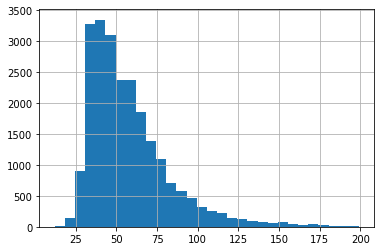

In [47]:
df['total_area'].hist(bins=30);

The bar chart below shows that most listings fall within the living space range of around 50 m2

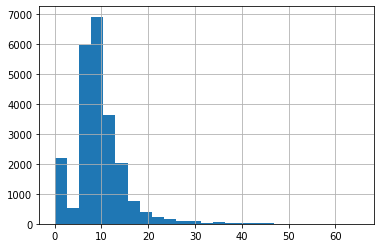

In [48]:
df['kitchen_area'].hist(bins=25);

5-15m2 kitchen area in most sample cases

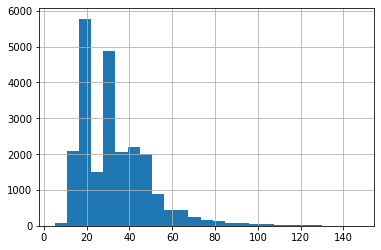

In [49]:
df['living_area'].hist(bins=25);

The most common living area - up to 50m2

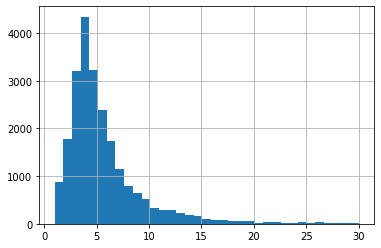

In [50]:
(df['last_price'] / 1000000).hist(range=(1,30), bins=35);

3-6 million - this price range covers most of the ads in the dataset.

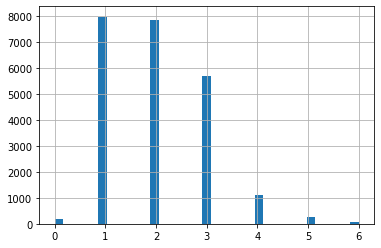

In [51]:
df['rooms'].hist(bins=35);

There are the most one-room and two-room apartments in the sample

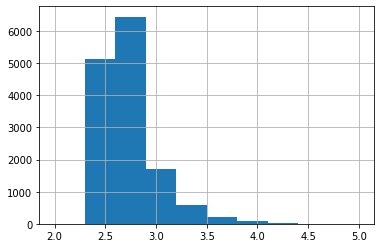

In [52]:
df['ceiling_height'].hist(range=(2,5));

Ceiling height up to 2.75m

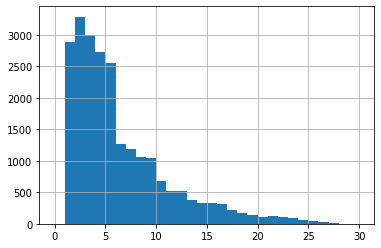

In [53]:
df['floor'].hist(range=(0, 30), bins=30);

Frequency distribution of floors of apartments for sale (in the bulk from 1 to 5)

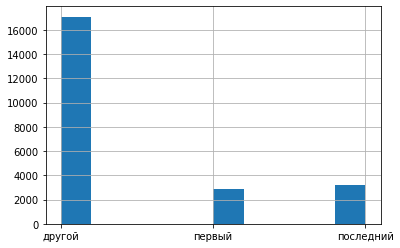

In [54]:
df['type_floor'].hist();

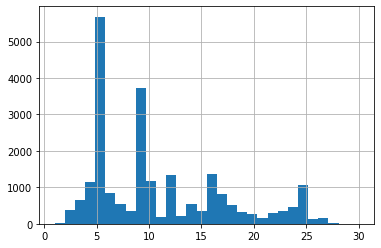

In [55]:
df['floors_total'].hist(range=(1,30), bins=30);

Five-story buildings are the most in the sample, followed by 9-story buildings.

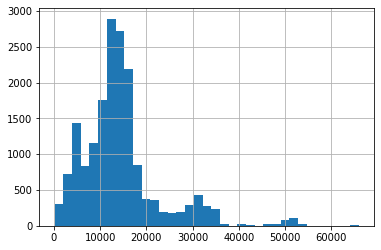

In [56]:
df['cityCenters_nearest'].hist(bins=35);

The largest number of distances from the city center lies in the range from 10-15 km

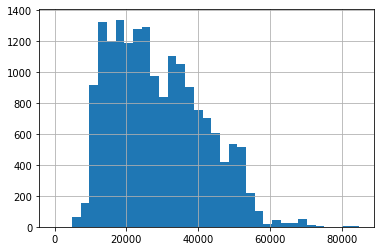

In [57]:
df['airports_nearest'].hist(bins=35);

The graph below shows - expect the airport to be at a distance of less than 15 km from housing
I don’t have to, but maybe it’s for the best, for example, I live 7 km from the airport, and I can’t say
that i like it a lot

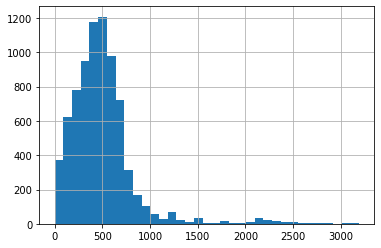

In [58]:
df['parks_nearest'].hist(bins=35);

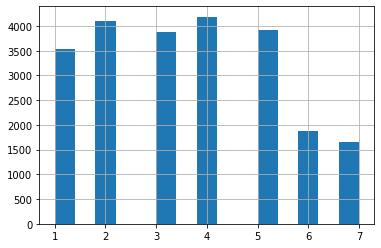

In [59]:
df['ad_day'].hist(bins=15);

There were fewer ads on weekends than on weekdays.

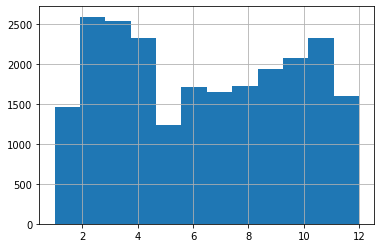

In [60]:
df['ad_month'].hist(bins=12);

There is a downtrend in ad submissions from February to March, a slight surge
in June and an uptrend from July to November. December, January and May - market, apparently
a little fades (holidays after all)

In [61]:
df['days_exposition'].describe()

count    20109.000000
mean       179.092745
std        218.003639
min          1.000000
25%         45.000000
50%         94.000000
75%        228.000000
max       1580.000000
Name: days_exposition, dtype: float64

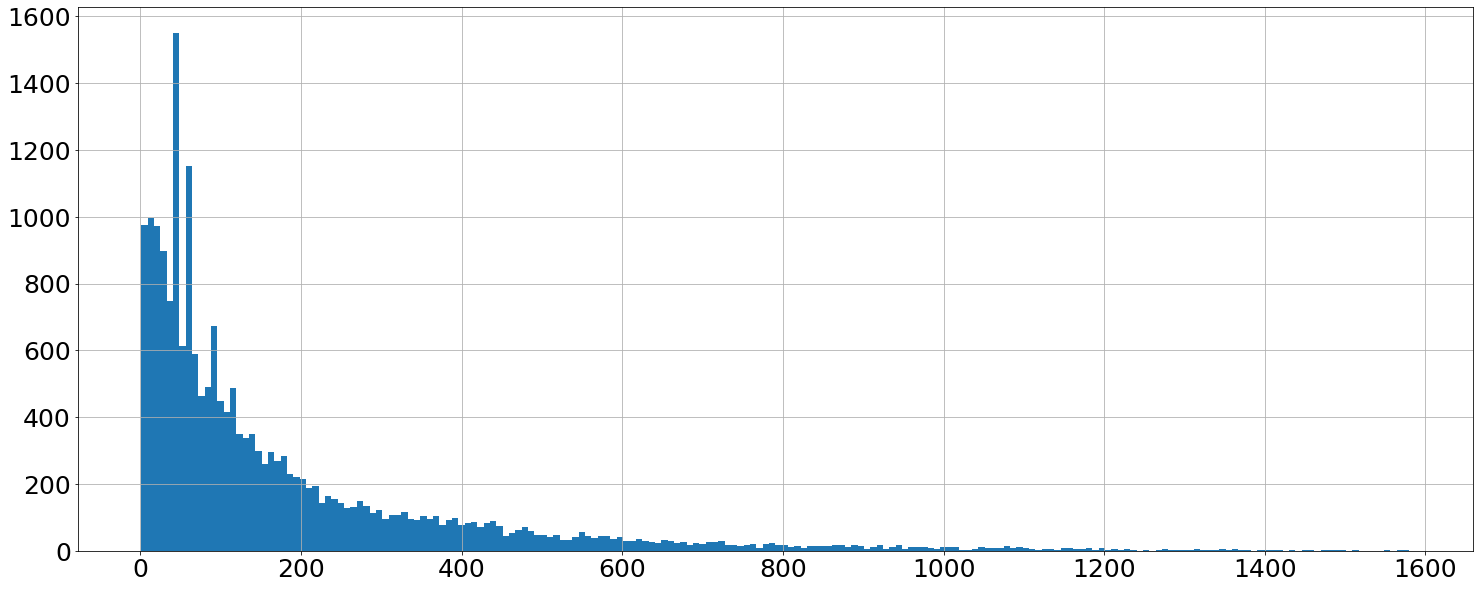

In [62]:
df['days_exposition'].hist(bins=200, figsize=(25,10), xlabelsize=25, ylabelsize=25);

<AxesSubplot:>

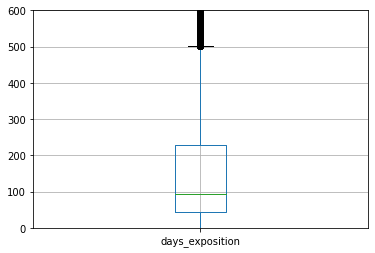

In [63]:
plt.ylim(0, 600)
df.boxplot(column='days_exposition')

#### В среднем квартиры продавались примерно 181 день, по медианому значению за 95. Аномально долгие продажи - свыше 500 дней. Быстрыми продажами я бы назвал продажи из первого квантиля - до 45 дней.

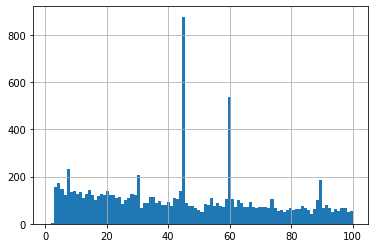

In [64]:
df[df['days_exposition'] <= 100]['days_exposition'].hist(bins=100);

Strong spikes occur around days 45 and 60. Perhaps this is due to the site itself for placing ads, where there are some specific end periods for posting the ad itself and actions from the user are needed to extend it.

In [65]:
df[df['days_exposition'] <= 100]['last_price']

1        3350000.0
5        2890000.0
11       3300000.0
12       3890000.0
15       4650000.0
           ...    
23525    3200000.0
23526    9200000.0
23527    3550000.0
23528    5500000.0
23533    3100000.0
Name: last_price, Length: 10413, dtype: float64

In [66]:
df['last_price_q'] = pd.qcut(df['last_price'], 15, duplicates='drop')

In [67]:
df.groupby('last_price_q')['days_exposition'].agg(['count', 'mean', 'median', max, min])

,count,mean,median,max,min
last_price_q,,,,,
"(429999.999, 2100000.0]",1314,170.207763,91.5,1396.0,3.0
"(2100000.0, 2750000.0]",1420,162.947183,85.5,1375.0,3.0
"(2750000.0, 3150000.0]",1387,157.403028,84.0,1231.0,3.0
"(3150000.0, 3500000.0]",1612,166.818238,82.0,1580.0,3.0
"(3500000.0, 3790000.0]",1213,149.423743,74.0,1368.0,3.0
"(3790000.0, 4100000.0]",1560,155.373718,82.5,1314.0,1.0
"(4100000.0, 4430000.0]",1286,165.074650,86.0,1512.0,3.0
"(4430000.0, 4800000.0]",1508,156.349469,85.0,1346.0,3.0
"(4800000.0, 5200000.0]",1275,175.165490,92.0,1315.0,3.0


<AxesSubplot:xlabel='last_price_q'>

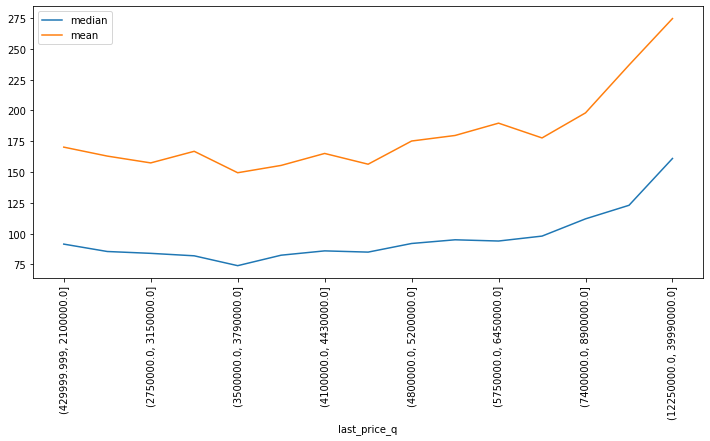

In [68]:
# The graph shows that the median and medium values ​​increase with increasing value.
#Slight decline around 3.5M-3.8M by median is probably due to
#with greater liquidity of this housing group
df.groupby('last_price_q')['days_exposition']\
.agg(['count', 'mean', 'median', max, min]).plot(y=['median', 'mean'], rot=90, figsize=(12, 5))

<AxesSubplot:xlabel='type_floor'>

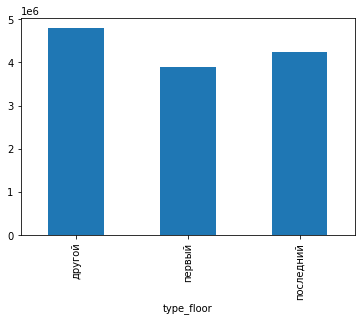

In [74]:
#по графику видно, что медианная стоимость первого и последнего этажей ниже чем других.
df.groupby('type_floor')['last_price'].median().plot(kind='bar')

<AxesSubplot:xlabel='ad_day'>

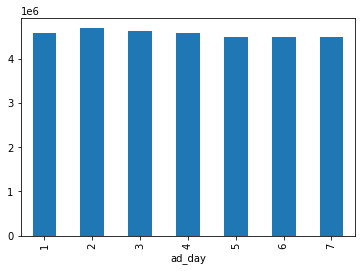

In [76]:
#according to this conclusion, it seems that it does not matter what day
#an announcement has been posted. The rich and not so have no preference on which day to serve
#announcement
df.groupby('ad_day')['last_price'].median().plot(kind='bar')

<AxesSubplot:xlabel='ad_year'>

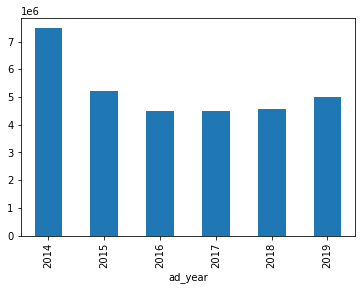

In [78]:
#Наиболее высокая медианная цена за квартиру наблюдалась в 2014г - около 7.7млн руб., далее снижалась
#до 2016 - до 4.5мл и к 19 году добралась до отметки 5млн 
df.groupby('ad_year')['last_price'].median().plot(kind='bar')

In [79]:
#correlation calculation for total area, living area, kitchen area and number of rooms using
df[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']].corr()

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.773320,0.636075,0.495385,0.474293
total_area,0.773320,1.000000,0.908701,0.480226,0.788695
living_area,0.636075,0.908701,1.000000,0.277946,0.880692
kitchen_area,0.495385,0.480226,0.277946,1.000000,0.189915
rooms,0.474293,0.788695,0.880692,0.189915,1.000000


The linear relationship of price is most pronounced with the total area and, to a lesser extent, with the number of rooms.

In [80]:
#average price of one square meter in 10 locations with the largest number of ads
top10_city_price_sq_m = (df.groupby('locality_name')['price_one_sq_m']
 .agg(['count','mean']).sort_values(by='count',ascending=False).head(10))
top10_city_price_sq_m

,count,mean
locality_name,,
Санкт-Петербург,15303,111623.410703
Мурино,585,86015.025069
Кудрово,469,95261.963450
посёлок Шушары,439,78551.344545
Всеволожск,397,68719.320400
Пушкин,364,103122.538840
Колпино,337,75333.295801
посёлок Парголово,326,90332.263023
Гатчина,307,68746.146763


In [81]:
top10_city_price_sq_m['mean'].head(1)

locality_name
Санкт-Петербург    111623.410703
Name: mean, dtype: float64

The highest price per sq.m. in the list of top 10 - St. Petersburg - 114795.4

In [82]:
top10_city_price_sq_m['mean'].tail(1)

locality_name
Выборг    58238.143141
Name: mean, dtype: float64

The lowest price per sq.m. in the list of top 10 - Vyborg - 58238.1

<AxesSubplot:xlabel='cityCenters_nearest_km'>

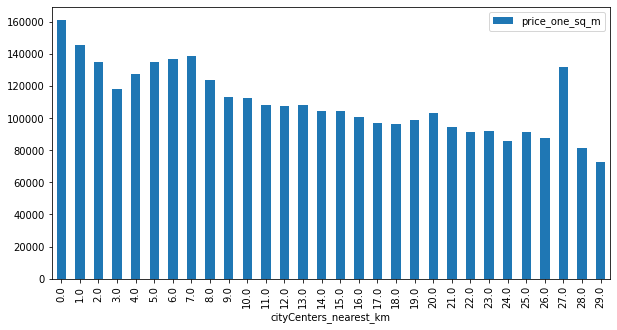

In [83]:
#the relationship between the distance to the city center from the cost per square meter
(df[df['locality_name'] == 'Санкт-Петербург']
 .pivot_table(index='cityCenters_nearest_km', values='price_one_sq_m', aggfunc='mean')
 .plot(figsize=(10, 5), kind='bar'))